<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [7]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [8]:
df.tail().T

,564,565,566,567,568
id,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,B
radius_mean,21.56,20.13,16.6,20.6,7.76
texture_mean,22.39,28.25,28.08,29.33,24.54
perimeter_mean,142.0,131.2,108.3,140.1,47.92
area_mean,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1389,0.09791,0.05302,0.152,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# drop unnamed column
df.drop(['Unnamed: 32', 'id'], inplace=True, axis=1)
df.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [13]:
bm_map = {
    'B': 0,
    'M': 1}

df['diagnosis'] = df['diagnosis'].map(bm_map)
df.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900


### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [15]:
# ANSWER
X = df.drop(columns = ['diagnosis']) # features

y = df['diagnosis'] # target

In [16]:
X.head().T

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [17]:
X.shape

(569, 30)

In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
y.shape

(569,)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [25]:
# ANSWER
correlation_matrix = df.corr()
print(correlation_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [27]:
# ANSWER
# Calculate eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

# Print eigenvalues
print("Eigenvalues:\n", eig_vals)

# Print eigenvectors
print("Eigenvectors:\n", eig_vecs)

Eigenvalues:
 [1.39177709e+01 5.72635217e+00 2.84684948e+00 1.99836314e+00
 1.65907858e+00 1.20750790e+00 6.84719154e-01 4.84855438e-01
 4.16894830e-01 3.50893638e-01 3.04855395e-01 2.90985845e-01
 2.61010421e-01 2.12275550e-01 1.48576184e-01 8.81625619e-02
 7.98601726e-02 5.90353306e-02 5.14619081e-02 4.82159487e-02
 3.07062788e-02 2.95266509e-02 2.73446674e-02 2.42835925e-02
 1.75522144e-02 1.54733379e-02 8.05614370e-03 6.86973193e-03
 1.32634701e-04 7.41678754e-04 1.58846728e-03]
Eigenvectors:
 [[ 2.16916950e-01 -7.76099428e-02  1.03825983e-01  9.80829303e-02
   8.07832685e-02 -1.20502582e-02  1.46156747e-01 -1.82757245e-01
  -3.12727329e-04 -5.02139227e-02  6.44348300e-01 -3.19011095e-01
  -3.39503703e-02  4.79306091e-01  2.47454171e-01  1.77559197e-01
   4.66616890e-03  3.86104471e-02 -6.07206769e-02  9.19338179e-02
  -3.66629983e-02  5.32798034e-02  2.43929179e-02  1.73954642e-02
   4.94301992e-02 -6.81411410e-03 -2.35299964e-02 -1.24864678e-02
  -1.34843760e-03  5.60685994e-03  

In [28]:
type(eig_vals)

numpy.ndarray

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [30]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
        This is done by dividing each eigenvalue by the sum of all eigenvalues. This gives the proportion of variance explained by each principal component.

    Return a list or array containing the cumulative explained variance
        Sum the explained variance of the principal components in a cumulative manner to get the cumulative explained variance.
    '''

    # Calculate explained variance for each eigenvalue
    explained_variance = eig_vals / np.sum(eig_vals)
    
    # Calculate cumulative explained variance
    cum_var_exp = np.cumsum(explained_variance)

    return cum_var_exp

In [31]:
# Call the function and capture the result
cum_var_exp = calculate_cum_var_exp(eig_vals)

print(cum_var_exp)

[0.44896035 0.63368139 0.72551525 0.78997857 0.84349724 0.8824491
 0.90453682 0.92017732 0.93362554 0.94494469 0.95477873 0.96416537
 0.97258506 0.97943266 0.98422544 0.98706939 0.98964553 0.99154989
 0.99320996 0.99476531 0.99575583 0.99670831 0.99759039 0.99837374
 0.99893994 0.99943908 0.99969895 0.99992056 0.99992483 0.99994876
 1.        ]


In [32]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

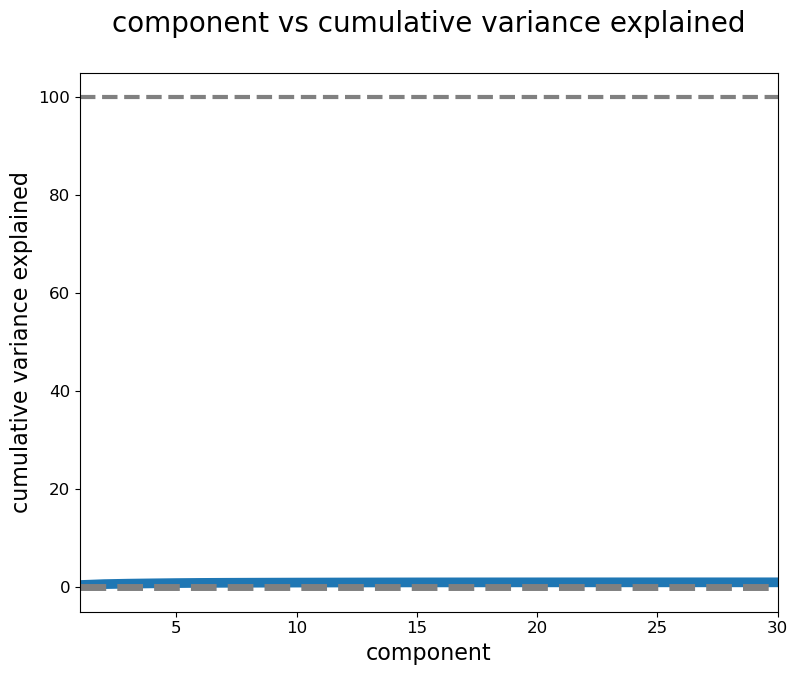

In [33]:
# Call the function
plot_var_exp(eig_vals)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
# ANSWER
# Create an instance of PCA
pca = PCA()

# Fit Xs
Xs = pca.fit(X)

In [37]:
Xs

PCA()

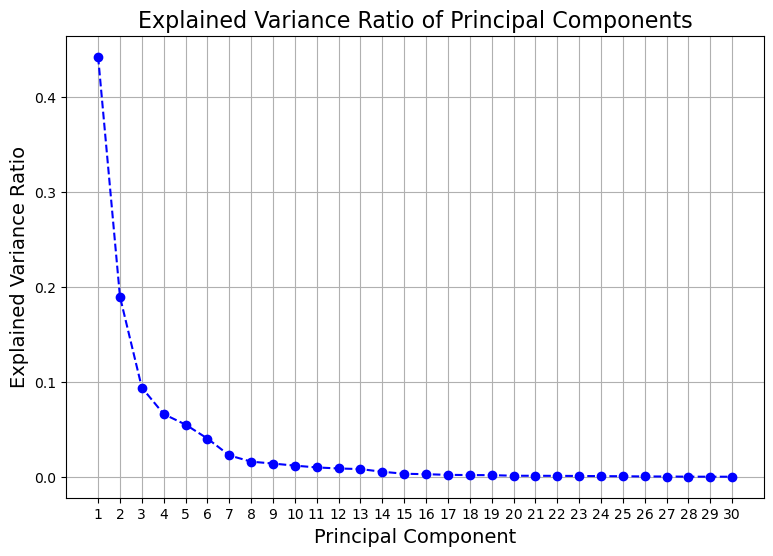

In [38]:
# ANSWER
# Plot explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(9, 6))

# Plot the explained variance ratio for each principal component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')

# Add a title and labels
plt.title('Explained Variance Ratio of Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)

# Show the plot
plt.show()

In [39]:
cumulative_variance = explained_variance_ratio.cumsum()
print("\nCumulative explained variance ratio:")
print(cumulative_variance)


Cumulative explained variance ratio:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [40]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

# Create an instance of PCA specifying the number of components
pca = PCA(n_components=2)  # Reduce to 2 dimensions

X_transformed = pca.fit_transform(X)

print("Transformed Data:\n", X_transformed)

Transformed Data:
 [[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


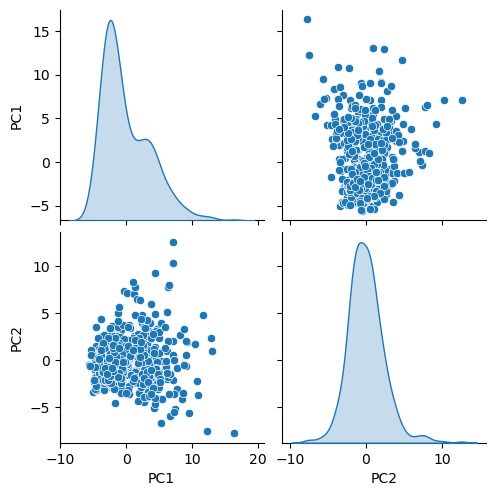

In [41]:
# ANSWER
# Create PairPlot of PCA

# Create a DataFrame from the PCA-transformed data
pca_df = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])

# Create a pairplot
sns.pairplot(pca_df, palette='viridis', diag_kind='kde')
plt.show()

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the PCA class and set at 16 components
pca = PCA(n_components=16)

# Apply PCA to the standardised features
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [47]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled

# Instantiate the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the scaled training data
knn.fit(X_train_scaled, y_train)

# Optionally, print a message to confirm the model has been fitted
print("KNN Classifier has been fitted to the training data.")


KNN Classifier has been fitted to the training data.


In [48]:
# Test accuracy of KNN using standardised data
# Predict the labels for the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of KNN classifier on the standardized test data: {accuracy:.4f}")

Accuracy of KNN classifier on the standardized test data: 0.9474


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [49]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca

# Create the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the PCA-transformed training data
knn.fit(X_train_scaled_pca, y_train)




KNeighborsClassifier()

In [50]:
# Test accuracy of KNN using standardised PCA-transformed data

# Predict the labels for the PCA-transformed test data
y_pred_pca = knn.predict(X_test_scaled_pca)

# Evaluate the accuracy of the KNN classifier
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of KNN classifier on PCA-transformed test data: {accuracy_pca:.4f}")

Accuracy of KNN classifier on PCA-transformed test data: 0.9561


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



